In [ ]:
# env set up:  https://classroom.udacity.com/courses/ud120/lessons/2254358555/concepts/30199885720923

In [1]:
import sys
import pickle
import math
import matplotlib.pyplot as plt
import matplotlib.pyplot 
import numpy
import pandas as pd


In [2]:
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data

/Users/kelleymantione/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# job is to use dataset to build pipeline that identifies if an Enron employee was a POI (Person of Interest) in the Enron scandal.
# dataset contains names of Enron employees, with the 'poi' attribute as target 
data_dict = pickle.load(open("final_project_dataset.pkl", "rb") )

In [4]:
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [5]:
""" featureFormat

    A general tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person

    In addition to converting a dictionary to a numpy 
    array, you may want to separate the labels from the
    features--this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes that the
    label is the _first_ item in feature_list--very important
    that poi is listed first!
"""

' featureFormat\n\n    A general tool for converting data from the\n    dictionary format to an (n x k) python list that\'s \n    ready for training an sklearn algorithm\n\n    n--no. of key-value pairs in dictonary\n    k--no. of features being extracted\n\n    dictionary keys are names of persons in dataset\n    dictionary values are dictionaries, where each\n        key-value pair in the dict is the name\n        of a feature, and its value for that person\n\n    In addition to converting a dictionary to a numpy \n    array, you may want to separate the labels from the\n    features--this is what targetFeatureSplit is for\n\n    so, if you want to have the poi label as the target,\n    and the features you want to use are the person\'s\n    salary and bonus, here\'s what you would do:\n\n    feature_list = ["poi", "salary", "bonus"] \n    data_array = featureFormat( data_dictionary, feature_list )\n    label, features = targetFeatureSplit(data_array)\n\n    the line above (targetFea

In [5]:
# creates numpy array from dictionary (key-value)
#check for outliers using matplotlib
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)
data

array([[  3.65788000e+05,   6.00000000e+05],
       [  2.67102000e+05,   1.20000000e+06],
       [  1.70941000e+05,   3.50000000e+05],
       [  2.43293000e+05,   1.50000000e+06],
       [  2.67093000e+05,   3.25000000e+05],
       [  3.70448000e+05,   2.60000000e+06],
       [  3.74125000e+05,   1.15000000e+06],
       [  1.97091000e+05,   4.00000000e+05],
       [  1.30724000e+05,   0.00000000e+00],
       [  2.48546000e+05,   8.50000000e+05],
       [  2.57486000e+05,   7.00000000e+05],
       [  2.88542000e+05,   1.20000000e+06],
       [  2.51654000e+05,   1.10000000e+06],
       [  2.88558000e+05,   2.50000000e+05],
       [  6.37440000e+04,   0.00000000e+00],
       [  3.57091000e+05,   8.50000000e+05],
       [  2.71442000e+05,   3.10000000e+06],
       [  3.04110000e+05,   2.00000000e+06],
       [  1.87922000e+05,   2.50000000e+05],
       [  2.13625000e+05,   1.00000000e+06],
       [  2.49201000e+05,   7.00000000e+05],
       [  2.31330000e+05,   7.00000000e+05],
       [  

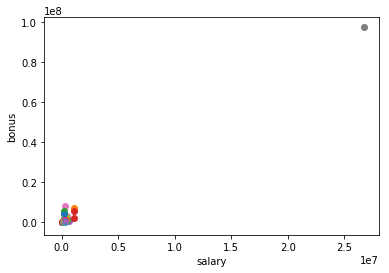

In [6]:

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [8]:
# we have an outlier, look at enroninsider.pdf to see which one it is, then remove

In [7]:
#From the plot done above, see that we need to remove the "TOTAL" key that is part of the insiderpay.pdf
data_dict.pop("TOTAL")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [8]:
#think about possible new features
#it might be helpful to understand what persentage of a person's email was to or from a POI

#1.  fraction_from_poi to this person = from_poi_to_this_person/from_messages
#2.  fraction_to_poi from this person = to_poi_from_this_person/to_messages
 
#create new feature fraction of stock options that were exercised
#3.  fraction_exercised  = exercised_stock_options/total_stock_value
   




In [9]:
def computeFraction( num, denom ):

    fraction = 0.
    if (math.isnan(float(num)) | math.isnan(float(denom)) ):
        return fraction
    fraction = float(num)/float(denom)
    return fraction

In [10]:
# calculate new feature values

for key in data_dict.keys():
    
    data_point = data_dict[key]

    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = computeFraction( from_poi_to_this_person, to_messages )
    data_point["fraction_from_poi"] = fraction_from_poi

    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
    data_point["fraction_to_poi"] = fraction_to_poi

    
    exercised_stock_options = data_point["exercised_stock_options"]
    total_stock_value = data_point["total_stock_value"]
    fraction_exercised = computeFraction( exercised_stock_options, total_stock_value )
    data_point["fraction_exercised"] = fraction_exercised

    data_dict[key] = data_point

In [13]:
# see new features added
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'fraction_exercised': 1.0,
  'fraction_from_poi': 0.016195727084769126,
  'fraction_to_poi': 0.029612756264236904,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'fraction_exercised': 1.0,
  'fraction_from_poi': 0.0

In [11]:
#Examine features, try different feature list.  This is iterative process.  Label must be first
#features_list = ['poi','total_payments','exercised_stock_options','shared_receipt_with_poi']
features_list = ['poi','total_payments','exercised_stock_options','shared_receipt_with_poi','fraction_from_poi','fraction_to_poi','fraction_exercised']

In [12]:
# Extract features and labels from dataset for local testing
#replaces NaN with 0


data = featureFormat(data_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
features



[array([  4.48444200e+06,   1.72954100e+06,   1.40700000e+03,
          1.61957271e-02,   2.96127563e-02,   1.00000000e+00]),
 array([  1.82466000e+05,   2.57817000e+05,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([  9.16197000e+05,   4.04615700e+06,   4.65000000e+02,
          6.89045936e-02,   0.00000000e+00,   7.71653863e-01]),
 array([  5.63434300e+06,   6.68054400e+06,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   6.28860186e-01]),
 array([ 827696.,       0.,       0.,       0.,       0.,       0.]),
 array([  8.60136000e+05,   1.59964100e+06,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([  9.69068000e+05,   0.00000000e+00,   2.63900000e+03,
          1.96855776e-02,   8.88786553e-02,   0.00000000e+00]),
 array([  5.50163000e+06,   9.53136000e+05,   5.52100000e+03,
          2.85320986e-02,   2.23140496e-01,   8.58136049e-01]),
 array([  1.02500000e+05,   3.28500000e+03,   0.

In [13]:
#using SelectKBest for feature selection- selecting best 2

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

features = SelectKBest(f_classif, k=2).fit_transform(features, labels)
features

array([[  1.72954100e+06,   2.96127563e-02],
       [  2.57817000e+05,   0.00000000e+00],
       [  4.04615700e+06,   0.00000000e+00],
       [  6.68054400e+06,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  1.59964100e+06,   0.00000000e+00],
       [  0.00000000e+00,   8.88786553e-02],
       [  9.53136000e+05,   2.23140496e-01],
       [  3.28500000e+03,   0.00000000e+00],
       [  1.62439600e+06,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  2.60449000e+06,   3.44827586e-02],
       [  1.46573400e+06,   2.00000000e-01],
       [  7.65313000e+05,   1.42857143e-01],
       [  0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   5.55555556e-01],
       [  0.00000000e+00,   2.43902439e-02],
       [  8.25464000e+05,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  2.54281300e+06,   6.74264008e-02],
       [  0.00000000e+00,   1.73611111e-01],
       [  0.00000000e+00,   4.66666667e-01],
       [  

In [14]:
#split data into test & train
from sklearn import cross_validation
features_train,features_test,labels_train,labels_test = cross_validation.train_test_split(features,labels,test_size=0.3,random_state=42)

In [15]:
### Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [16]:
#Decision Tree- best of these?  add others to try
from sklearn import tree
from sklearn.grid_search import GridSearchCV
clf = tree.DecisionTreeClassifier()

/Users/kelleymantione/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [38]:
#Naive-Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  

In [55]:
#SVM
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C=1e-05,gamma=0.0001, class_weight={1:100})


In [17]:
clf=clf.fit(features_train, labels_train)

In [18]:
# how did we do- want better than .3 precision and recall 
#accuracy
acc = clf.score(features_test, labels_test)
print ("accuracy is : " + str(acc))
predicted_labels=clf.predict(features_test)

#precision, recall
from sklearn.metrics import precision_score
ps = precision_score(labels_test, predicted_labels)
print ("precision is : " + str(ps))

from sklearn.metrics import recall_score
rs = recall_score(labels_test, predicted_labels)
print ("recall is : " + str(rs))

accuracy is : 0.883720930233
precision is : 0.4
recall is : 0.5


In [22]:
###  Tune your classifier to achieve better than .3 precision and recall 
### using our testing script.
### Because of the small size of the dataset, the script uses stratified
### shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
test_classifier(clf, data_dict, features_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.83933	Precision: 0.38522	Recall: 0.34400	F1: 0.36344	F2: 0.35152
	Total predictions: 15000	True positives:  688	False positives: 1098	False negatives: 1312	True negatives: 11902



In [23]:
### Dump your classifier, dataset, and features_list so 
### anyone can run/check your results using tester.py

dump_classifier_and_data(clf, data_dict, features_list)

In [24]:
# look at some unsupervised techniques

In [25]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than 4 clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()




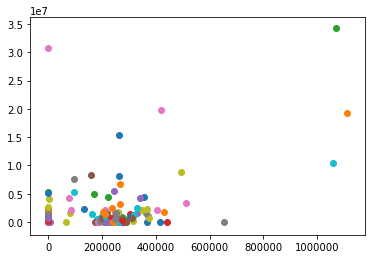

In [43]:

### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, line below assumes 2 features)
for f1, f2  in finance_features:
    plt.scatter( f1, f2 )
plt.show()





In [44]:
from sklearn.cluster import KMeans
features_list = ["poi", feature_1, feature_2]
data2 = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data2 )

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rescaled_finance_features = scaler.fit_transform(finance_features)
output = scaler.transform(numpy.array([200000.,1000000.]))
output


/Users/kelleymantione/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([ 0.17997621,  0.02911345])

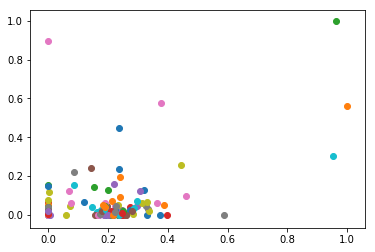

In [45]:
for f1, f2 in rescaled_finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [46]:
clf = KMeans(n_clusters=3)
pred = clf.fit_predict( finance_features )
pred



array([0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

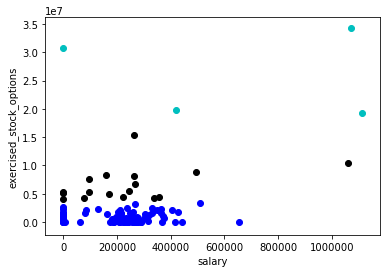

In [47]:
Draw(pred, finance_features, poi, name="clusters_before_scaling.pdf", f1_name=feature_1, f2_name=feature_2)

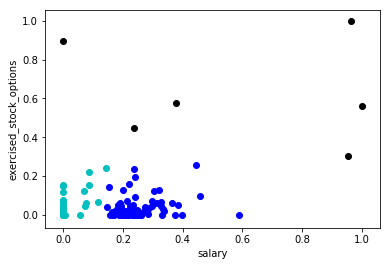

In [48]:
pred = clf.fit_predict( rescaled_finance_features )
Draw(pred, rescaled_finance_features, poi, name="clusters_after_scaling.pdf", f1_name=feature_1, f2_name=feature_2)

In [53]:
X = numpy.array([[.1, .2], [.3, .1], [1, 1]])
out = clf.predict(X)
out

array([1, 0, 2], dtype=int32)

In [5]:
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [6]:
# playing with different data formats- need to be ready for csv, xml, json to convert to numpy array for sci-kit

# write data as csv

#data_df = pd.DataFrame(data_dict, columns=['name','salary','to_messages','deferral_payments',
#                                                                     'total_payments','loan_advances','bonus','email_address',
#                                                                     'restricted_stock_deferred','deferred_income',
#                                                                     'total_stock_value','expenses','from_poi_to_this_person',
#                                                                     'exercised_stock_options','from_messages','other',
#                                                                     'from_this_person_to_poi','poi','long_term_incentive',
#                                                                     'shared_receipt_with_poi','restricted_stock','director_fees'])
#
data_df = pd.DataFrame.from_dict(data_dict,orient='index')


                                           

data_df=data_df.reset_index()
data_df['name'] = data_df['index']
data_df = data_df.drop(['index'], axis=1)
data_df



,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,name
0,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,...,1729541,2195,152,65,False,304805,1407,126027,NaN,ALLEN PHILLIP K
1,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,...,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,BADUM JAMES P
2,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,...,4046157,29,864523,0,False,NaN,465,1757552,NaN,BANNANTINE JAMES M
3,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN,BAXTER JOHN C
4,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,...,NaN,NaN,69,NaN,False,NaN,NaN,145796,NaN,BAY FRANKLIN R
5,80818,NaN,684694,860136,NaN,NaN,NaN,NaN,NaN,1599641,...,1599641,NaN,874,NaN,False,93750,NaN,NaN,NaN,BAZELIDES PHILIP J
6,231330,7315,NaN,969068,NaN,700000,sally.beck@enron.com,NaN,NaN,126027,...,NaN,4343,566,386,False,NaN,2639,126027,NaN,BECK SALLY W
7,213999,7991,2144013,5501630,NaN,5249999,tim.belden@enron.com,NaN,-2334434,1110705,...,953136,484,210698,108,True,NaN,5521,157569,NaN,BELDEN TIMOTHY N
8,NaN,NaN,-102500,102500,NaN,NaN,NaN,44093,NaN,-44093,...,3285,NaN,NaN,NaN,False,NaN,NaN,NaN,3285,BELFER ROBERT
9,216582,NaN,NaN,228474,NaN,NaN,david.berberian@enron.com,NaN,NaN,2493616,...,1624396,NaN,NaN,NaN,False,NaN,NaN,869220,NaN,BERBERIAN DAVID


In [7]:
#Create a CSV file:

data_df.to_csv('final_project_dataset.csv', sep=',', index=False)

In [8]:
#Read CSV back:
df = pd.read_csv("final_project_dataset.csv", usecols=['salary','to_messages','deferral_payments',
                                                            'total_payments','loan_advances','bonus','email_address',
                                                            'restricted_stock_deferred','deferred_income',
                                                            'total_stock_value','expenses','from_poi_to_this_person',
                                                            'exercised_stock_options','from_messages','other',
                                                            'from_this_person_to_poi','poi','long_term_incentive',
                                                        'shared_receipt_with_poi','restricted_stock','director_fees', 'name'])

df



,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,name
0,201955.0,2902.0,2869717.0,4484442.0,NaN,4175000.0,phillip.allen@enron.com,-126027.0,-3081055.0,1729541.0,...,1729541.0,2195.0,152.0,65.0,False,304805.0,1407.0,126027.0,NaN,ALLEN PHILLIP K
1,NaN,NaN,178980.0,182466.0,NaN,NaN,NaN,NaN,NaN,257817.0,...,257817.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,BADUM JAMES P
2,477.0,566.0,NaN,916197.0,NaN,NaN,james.bannantine@enron.com,-560222.0,-5104.0,5243487.0,...,4046157.0,29.0,864523.0,0.0,False,NaN,465.0,1757552.0,NaN,BANNANTINE JAMES M
3,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,10623258.0,...,6680544.0,NaN,2660303.0,NaN,False,1586055.0,NaN,3942714.0,NaN,BAXTER JOHN C
4,239671.0,NaN,260455.0,827696.0,NaN,400000.0,frank.bay@enron.com,-82782.0,-201641.0,63014.0,...,NaN,NaN,69.0,NaN,False,NaN,NaN,145796.0,NaN,BAY FRANKLIN R
5,80818.0,NaN,684694.0,860136.0,NaN,NaN,NaN,NaN,NaN,1599641.0,...,1599641.0,NaN,874.0,NaN,False,93750.0,NaN,NaN,NaN,BAZELIDES PHILIP J
6,231330.0,7315.0,NaN,969068.0,NaN,700000.0,sally.beck@enron.com,NaN,NaN,126027.0,...,NaN,4343.0,566.0,386.0,False,NaN,2639.0,126027.0,NaN,BECK SALLY W
7,213999.0,7991.0,2144013.0,5501630.0,NaN,5249999.0,tim.belden@enron.com,NaN,-2334434.0,1110705.0,...,953136.0,484.0,210698.0,108.0,True,NaN,5521.0,157569.0,NaN,BELDEN TIMOTHY N
8,NaN,NaN,-102500.0,102500.0,NaN,NaN,NaN,44093.0,NaN,-44093.0,...,3285.0,NaN,NaN,NaN,False,NaN,NaN,NaN,3285.0,BELFER ROBERT
9,216582.0,NaN,NaN,228474.0,NaN,NaN,david.berberian@enron.com,NaN,NaN,2493616.0,...,1624396.0,NaN,NaN,NaN,False,NaN,NaN,869220.0,NaN,BERBERIAN DAVID
